# Loading data from Masakhane folder

In [19]:
!pip install pandas keras plot_keras_history  tensorflow

     |██████████████████████████▊     | 438.2 MB 97.0 MB/s eta 0:00:014  |▍                               | 6.5 MB 10.6 MB/s eta 0:00:49     |█                               | 15.1 MB 10.6 MB/s eta 0:00:49             | 135.1 MB 115.4 MB/s eta 0:00:04██████████████▋           | 336.9 MB 80.8 MB/s eta 0:00:03�███████████        | 392.6 MB 80.8 MB/s eta 0:00:02

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 524.1 MB 20 kB/s s eta 0:00:01��███████████▌| 516.7 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 22.9 MB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 63.8 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 29.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 86.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 61.5 MB/s eta 0:00:01�██████████████   | 4.7 MB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 88.3 MB/s eta 0:00:01
     |██

In [1]:
!pip install sagemaker -U

     |████████████████████████████████| 857 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 104.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 450 kB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 71.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 56.9 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-2.175.0-py2.py3-none-any.whl size=1165569 sha256=bf3a3bd4cbaa736b69ac269482263114303700e76428e09278be0db7fe5e46b9
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/15/a8/3f/a2fea2d992a28d07bbc11e39d5304405200a5dda20ec7913f3
Successfully built sagemaker
  Attempting uninstall: attrs
    Found existing installation: at

In [2]:
from pathlib import Path
import pandas as pd
import boto3
import sagemaker

In [3]:
# Reading folder path
# Context Masahkane community
# Ramshaw and Marcus (1995) = IOB data format

bbj_pos_path = Path('../data_source/masakhane-pos/data/bbj')
dev_data_path   = bbj_pos_path / 'dev.txt'
train_data_path = bbj_pos_path / 'train.txt'
test_data_path  = bbj_pos_path / 'test.txt'


In [8]:
dir(sagemaker.session.Session)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_sagemaker_config_tags',
 '_create_inference_recommendations_job_request',
 '_create_model_request',
 '_create_s3_bucket_if_it_does_not_exist',
 '_gen_s3_model_data_source',
 '_get_auto_ml_request',
 '_get_process_request',
 '_get_train_request',
 '_get_transform_request',
 '_get_tuning_request',
 '_get_update_training_job_request',
 '_initialize',
 '_intercept_create_request',
 '_map_training_config',
 '_map_tuning_config',
 '_map_tuning_objective',
 'account_id',
 'auto_ml',
 'batch_get_record',
 'boto_region_name',
 'compile_model',
 'create_endpoint',
 'create_endpoint_config',
 'create_endpoint_config_from_ex

In [22]:
# current_role = sagemaker.get_execution_role()
# region = boto3.Session().region_name

current_role = "SageMaker-Sangkak"
region = "us-west-2"
bucket = "sangkak-challenge"
prefix = "sagemaker/sangkak-xgboost-spot"

print(f"current_role: {current_role}")
print(f"region: {region}")
print(f"s3 bucket: {bucket}")
print(f"s3 prefix: {prefix}")

current_role: SageMaker-Sangkak
region: us-west-2
s3 bucket: sangkak-challenge
s3 prefix: sagemaker/sangkak-xgboost-spot


In [23]:
container = sagemaker.image_uris.retrieve('xgboost', region, 'latest')
print(container)

433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest


In [24]:
hyperparameters = {
    "max_depth": "5",
    "eta": "0.2",
    "gamma": "4",
    "min_child_weight": "6",
    "subsample": "0.7",
    "objective": "reg:squarederror",
    "num_round": "50"
}

instance_type = 'ml.m5.2xlarge'
output_path = 's3://{}/{}/{}/output'.format(bucket, prefix, 'abalone-xgb')
content_type = "libsvm"

In [38]:
# from auglib import augment_data
# from auglib import read_format_data, list_to_pd_format

# function that read IOB file and build data structure for train, test and dev
def read_format_data(filename):
    sents_id, words, tags_all = [], [], []
    all_extracted_data, only_pos_data, o_pos_data = [], [], []
    with open(filename, encoding='utf-8') as iob:
        sentence, id_sent, tags = [], 1, []
        for line in iob:
            if len(line) > 1:
                word, tag = line.strip().split(' ')
                sentence.append((word, tag))
                sents_id.append(id_sent)
                words.append(word)
                tags_all.append(tag)
                tags.append(tag)
            else:
                if sentence[-1] != '.':
                    sentence.append(('.', 'O'))
                    words.append('.')
                    tags_all.append('O')
                sents_id.append(id_sent)
                all_extracted_data.append(sentence)
                if check_pos_type(tags):
                    only_pos_data.append(sentence)
                else:
                    o_pos_data.append(sentence)
                sentence = []
                id_sent += 1
                tags = []
    dataframe = {"sentence_id": sents_id, "word": words, "tag": tags_all}
    pd_pos_data = pd.DataFrame.from_dict(dataframe)
    return all_extracted_data, pd_pos_data, only_pos_data, o_pos_data



In [37]:
# read and extract iob data
extracted_train_data, pd_train_data, only_train_ner_data, o_train_ner_data = read_format_data(train_data_path)
extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = read_format_data(test_data_path)
extracted_dev_data, pd_dev_data, only_dev_ner_data, o_dev_ner_data = read_format_data(dev_data_path)

# quelques stats liminaires
print("Total number of sentences in the train dataset: {:,}".format(pd_train_data["sentence_id"].nunique()))
print("Total words in the train dataset: {:,}".format(pd_train_data.shape[0]))
print("Total number of sentences in the test dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the test dataset: {:,}".format(pd_test_data.shape[0]))
print("Total number of sentences in the dev dataset: {:,}".format(pd_dev_data["sentence_id"].nunique()))
print("Total words in the dev dataset: {:,}".format(pd_dev_data.shape[0]))



NameError: name 'pd_data' is not defined

In [28]:
o_train_ner_data

[[('Mwɔ̌ʼ', 'NOUN'),
  ('pfʉ́tə́', 'VERB'),
  ('nə́', 'ADP'),
  ('mwâsi', 'NOUN'),
  ('máp', 'DET'),
  ('yə́', 'DET'),
  ('cwə', 'NOUN'),
  ('Cyəpɔ', 'PROPN'),
  ('Sǐ', 'NOUN'),
  ('kùʼ', 'VERB'),
  ('.', 'O')],
 [('Tə́', 'SCONJ'),
  ('gaə̌', 'PRON'),
  ('kwɛ', 'VERB'),
  ('gaə́', 'SCONJ'),
  ('Moteze', 'PROPN'),
  ('pə́', 'AUX'),
  ('tə', 'PART'),
  ('zhyə̌', 'VERB'),
  ('thə̂', 'NOUN'),
  ('nə', 'PART'),
  ('ntə̂m', 'VERB'),
  ('bə', 'SCONJ'),
  ('jʉɔjʉm', 'ADJ'),
  ('ghɔm', 'NOUN'),
  ('tsyə̂', 'DET'),
  ('gɔ', 'AUX'),
  ('pə́', 'AUX'),
  ('nə́', 'PART'),
  ('lô', 'VERB'),
  ('mhɔ', 'NOUN'),
  ('bíŋ', 'CCONJ'),
  ('gɔm', 'VERB'),
  ('tsʉʼ', 'NOUN'),
  ('yə', 'DET'),
  ('e', 'PRON'),
  ('dwɔʼ', 'VERB'),
  ('mshûʼ', 'NUM'),
  ('shâʼ', 'NUM'),
  ('ŋkâp', 'NOUN'),
  ('guŋ', 'NOUN'),
  ('nə́', 'ADP'),
  ('lə', 'DET'),
  ('.', 'O')],
 [('Mə́kuʼ', 'NOUN'),
  ('dʉmtʉm', 'ADJ'),
  ('Bi', 'PROPN'),
  ('Mvondo', 'PROPN'),
  ('pú', 'PRON'),
  ('ké', 'VERB'),
  ('é', 'PRON'),
  ('gaə

In [5]:
augmented_train_ner_data = augment_ner_iob_data(only_train_ner_data)

print(f' Train data: {len(only_train_ner_data)} \n Augmented data: {len(augmented_train_ner_data)}')

 Train data: 0 
 Augmented data: 0


In [6]:
# transform to pd format
pd_augment_ner_iob_data = list_to_pd_format(augmented_train_ner_data)
pd_augment_ner_iob_data

,sentence_id,word,iob_tag


# Analyzing data 

In [9]:
# quantification des tags sur le corpus d'entrainement
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [ ]:

pd_augment_ner_iob_data[pd_augment_ner_iob_data.iob_tag != 'O']["iob_tag"]\
.value_counts().plot(kind="bar", figsize=(20,15))

# On remarque ici que le tag date représente 40% des tags (en position I ou B)

La phrase la plus longue contient 47 mots.
ID de la plus longue phrase est: 4.

La phrase la plus longue du corpus est: 
 Fə̂ é Samuel Mvondo Ayolo gɔ síŋ wɔ́kpə pâʼ a kə́ shyətə tə́ e cyâ é gaə́ é ghɔ́ bá nə̂ e bə e katə kúʼ nə́ nə̂ŋ mghɛcɛ́ Mendize pyə wáp kə̂ shə́ŋ â daʼ nə́ nə̂ pfʉ̌ pfʉ́ m nə̂ bǔ pɔ páp lə .


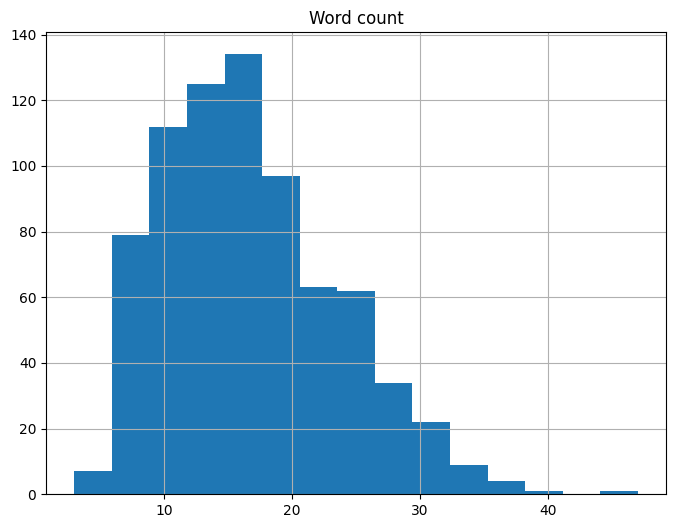

In [12]:

word_counts = pd_train_data.groupby("sentence_id")["word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=15, figsize=(8,6))

# On constate que le nombre de mots moyens par phrase est de 15
MAX_LENGTH_SENTENCE = word_counts.max()[0]
print("La phrase la plus longue contient {} mots.".format(MAX_LENGTH_SENTENCE))
longest_sentence_id = word_counts[word_counts["Word count"]==MAX_LENGTH_SENTENCE].index[0]
print("ID de la plus longue phrase est: {}.".format(longest_sentence_id))
longest_sentence = pd_train_data[pd_train_data["sentence_id"]==longest_sentence_id]["word"].str.cat(sep=' ')
print(f"\nLa phrase la plus longue du corpus est: \n {longest_sentence}")


In [13]:
all_words = list(set(pd_train_data["word"].values))
all_tags = list(set(pd_train_data["iob_tag"].values))

print("Nombre de mots uniques: {}".format(pd_train_data["word"].nunique()))
print("Nombre de tags uniques : {}".format(pd_train_data["iob_tag"].nunique()))

Nombre de mots uniques: 2841
Nombre de tags uniques : 16


# Features engineering

In [16]:
# word to index
word2index = {word: idx + 2 for idx, word in enumerate(all_words)}
word2index["--UNKNOWN_WORD--"]=0
word2index["--PADDING--"]=1
index2word = {idx: word for word, idx in word2index.items()}
# tag to index
tag2index = {tag: idx + 1 for idx, tag in enumerate(all_tags)}
tag2index["--PADDING--"]=1
index2tag = {idx: word for word, idx in tag2index.items()}

# test for one word
test_word = "Paul"
test_word_idx = word2index[test_word]
test_word_lookup = index2word[test_word_idx]
print("L'index du mot {} est {}.".format(test_word, test_word_idx))
print("Le mot avec l'index {} est {}.".format(test_word_idx, test_word_lookup))

L'index du mot Paul est 1672.
Le mot avec l'index 1672 est Paul.


In [ ]:
augmented_train_ner_data[5]

In [21]:
!pip install keras_preprocessing

     |████████████████████████████████| 42 kB 2.5 MB/s  eta 0:00:01


In [26]:
only_train_ner_data

[]

In [30]:
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences


X_words = [[word[0] for word in sentence] for sentence in o_train_ner_data]
y_tags = [[word[1] for word in sentence] for sentence in o_train_ner_data]
print("X_words[10]:", X_words[10])
print("y_tags[10]:", y_tags[10])

X_words = [[word2index[word] for word in sentence] for sentence in X_words]
y_tags = [[tag2index[tag] for tag in sentence] for sentence in y_tags]
print("\nword2index - X_words[10]:", X_words[10])
print("tag2index - y_tags[10]:", y_tags[10])

#X_words = [sentence + [word2index["--PADDING--"]] * (MAX_LENGTH_SENTENCE - len(sentence)) for sentence in X_words]
#y_tags = [sentence + [tag2index["--PADDING--"]] * (MAX_LENGTH_SENTENCE - len(sentence)) for sentence in y_tags]
X_words = pad_sequences(X_words, maxlen=MAX_LENGTH_SENTENCE, padding='post', value=word2index["--PADDING--"])
y_tags = pad_sequences(y_tags, maxlen=MAX_LENGTH_SENTENCE, padding='post', value=tag2index["--PADDING--"])


print("\npadding - X_words[10]: ", len(X_words[10]),  X_words[10])
print("padding - y_tags[10]: ", len(y_tags[10]), y_tags[10])

TAG_COUNT = len(tag2index)
y_tags = [np.eye(TAG_COUNT)[sentence] for sentence in y_tags]
# [np.eye(TAG_COUNT)[sentence] for sentence in augmented_train_ner_data]
# to_categorical(y_tags, num_classes=TAG_COUNT)

print("to categorical - y_tags[10]:", y_tags[10])


X_words[10]: ['Nə́', 'lə', 'msə̌ŋwi', 'gwá', 'shu', 'yə', 'boʼyɔ̂m', 'pəjyə́', 'səkúcyəgwɛ', 'á', 'ka', 'láʼtə́', 'cuŋ', 'e', 'nə̂', 'ntáknyə́', 'ntʉ́m', 'Bînam', 'Sîsǐ', 'gə́', 'Bînam', 'ŋkàʼ', '.']
y_tags[10]: ['PART', 'VERB', 'NOUN', 'VERB', 'NOUN', 'DET', 'ADJ', 'NOUN', 'NOUN', 'DET', 'PART', 'VERB', 'NOUN', 'DET', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'CCONJ', 'NOUN', 'ADP', 'O']

word2index - X_words[10]: [2738, 1995, 1972, 878, 1855, 577, 1600, 817, 2079, 1308, 227, 1303, 1148, 1350, 590, 2227, 1358, 702, 128, 956, 702, 1156, 2693]
tag2index - y_tags[10]: [15, 4, 16, 4, 16, 13, 9, 16, 16, 13, 15, 4, 16, 13, 7, 16, 7, 16, 7, 12, 16, 7, 1]

padding - X_words[10]:  47 [2738 1995 1972  878 1855  577 1600  817 2079 1308  227 1303 1148 1350
  590 2227 1358  702  128  956  702 1156 2693    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1]
padding - y_tags[10]:  47 [15  4 16  4 16 13  9 16 16 13 15  4 16 13  

In [31]:
print(len(y_tags), len(X_words))

y_train = np.array(y_tags)
X_train = np.array(X_words)

print(X_train.shape, y_train.shape)


750 750
(750, 47) (750, 47, 17)


# Modelling

In [47]:
#!pip uninstall keras tensorflow -y
!pip install "tensorflow<=2.5"
!pip install keras==2.2.4

     |████████████████████████████████| 454.4 MB 15 kB/s s eta 0:00:011    |██████████████████▎             | 259.3 MB 78.4 MB/s eta 0:00:03 357.7 MB 146.8 MB/s eta 0:00:01��██████████████████▉    | 395.4 MB 146.8 MB/s eta 0:00:01    |████████████████████████████▋   | 407.0 MB 146.8 MB/s eta 0:00:01     |██████████████████████████████  | 427.0 MB 93.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 51.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 85.9 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 74.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 85.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 61.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 63.7 MB/s eta 0:00:01
     |█

In [37]:
# !pip3 install plot_keras_history keras tensorflow_addons tensorflow
!pip3 install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-34kl0arz
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-34kl0arz
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101058 sha256=505f07fa7f02e42ecd7c2374749f749810d0ed589749c6abcf130b788ba8a435
  Stored in directory: /tmp/pip-ephem-wheel-cache-u8491z51/wheels/83/b3/99/125cd08d3e8224b434b1b4badd6f8b2651e0251b7e8f983e60
Successfully built keras-contrib


In [ ]:
!pip3 install keras_preprocessing 

In [36]:
!pip3 install keras_contrib

ERROR: Could not find a version that satisfies the requirement keras_contrib (from versions: none)
ERROR: No matching distribution found for keras_contrib


In [ ]:
!export TF_CPP_MIN_LOG_LEVEL="2"
!sudo apt-get install -y --no-install-recommends libnvinfer6=6.0.1-1+cuda11.0 \
    libnvinfer-dev=6.0.1-1+cuda11.0 \
    libnvinfer-plugin6=6.0.1-1+cuda11.0

In [48]:
import pickle
import operator
import re
import string
import matplotlib.pyplot as plt

#from plot_keras_history import plot_history
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
# from keras_contrib.utils import save_load_utils

from keras import layers
from keras import optimizers

from keras.models import Model
from keras.losses import CategoricalCrossentropy
from keras import Input

from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from keras_contrib.layers import CRF
#from tensorflow_addons.layers import CRF
from keras_contrib import losses
from keras_contrib import metrics

In [50]:
WORD_COUNT = len(index2word)
DENSE_EMBEDDING = 50
LSTM_UNITS = 10
LSTM_DROPOUT = 0.1
DENSE_UNITS = 20
BATCH_SIZE = 20
MAX_EPOCHS = 50

In [51]:
input_layer = layers.Input(shape=(MAX_LENGTH_SENTENCE,))

model = layers.Embedding(WORD_COUNT, DENSE_EMBEDDING, embeddings_initializer="uniform", 
                                input_length=MAX_LENGTH_SENTENCE)(input_layer)
model = layers.Bidirectional(layers.LSTM(LSTM_UNITS, recurrent_dropout=LSTM_DROPOUT, 
                            return_sequences=True))(model)
model = layers.TimeDistributed(layers.Dense(DENSE_UNITS, activation="relu"))(model)

crf_layer = CRF(units=TAG_COUNT, sparse_target=True)
output_layer = crf_layer(model)

ner_model = Model(input_layer, output_layer)

loss = losses.crf_loss
acc_metric = metrics.crf_accuracy
opt = optimizers.Adam(learning_rate=1e-3)

ner_model.compile(optimizer=opt, loss=loss, metrics=[acc_metric])
ner_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 47)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 47, 50)            142150    
                                                                 
 bidirectional_1 (Bidirecti  (None, 47, 20)            4880      
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 47, 20)            420       
 stributed)                                                      
                                                                 
 crf_1 (CRF)                 (None, 47, 17)            680       
                                                                 
Total params: 148130 (578.63 KB)
Trainable params: 148130 (

In [52]:
filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor=acc_metric, verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [53]:
history = ner_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=MAX_EPOCHS, 
                        verbose=2, callbacks=callbacks_list)


Epoch 1/50


AttributeError: in user code:

    File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras_contrib/losses/crf_losses.py", line 54, in crf_loss  *
        crf, idx = y_pred._keras_history[:2]

    AttributeError: 'Tensor' object has no attribute '_keras_history'
